In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [1]:
import pandas as pd 
import  numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df = df.copy()
df = df[df['TotalCharges'] != " "]  # убрать строки с пробелами
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.reset_index(drop=True, inplace=True)


### **Churn Rate by Contract Type**

##### The chart illustrates the proportion of customers who churned based on their contract type:

##### Month-to-month contracts have the highest churn rate (~43%), indicating a higher likelihood of customer departure when no long-term commitment is required.

##### One year contracts show a significantly lower churn rate (~11%).

##### Two year contracts have the lowest churn rate (~3%), suggesting strong customer retention when longer commitments are in place.

##### This analysis highlights the importance of promoting long-term contracts as a strategy to reduce customer churn.

<Axes: title={'center': 'Churn Rate by Contract'}, xlabel='Contract'>

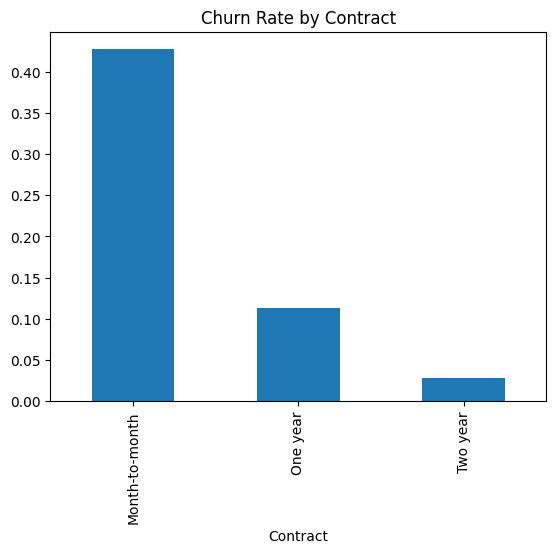

In [4]:
churn_by_contract = df.groupby('Contract')['Churn'].mean().sort_values(ascending=False)
churn_by_contract.plot(kind='bar', title='Churn Rate by Contract')


### **We created a new column called tenure_group by splitting the tenure (customer's time with the company) into five time-based segments:**

#### 0–3 months

#### 4–6 months

#### 7–12 months

#### 1–2 years

#### More than 2 years

### **This grouping helps generalize customer lifespans into broader categories, making it easier to analyze trends.**

#### Then, we calculated the churn rate for each group and visualized it with a bar chart, where:

#### X-axis shows the tenure ranges

#### Y-axis shows the average churn rate (i.e., the proportion of customers who left)

#### This analysis helps us understand how the likelihood of churn changes depending on how long a customer has been with the company.

/tmp/ipykernel_36/3059660377.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retention_by_tenure = df.groupby('tenure_group')['Churn'].mean()


<Axes: title={'center': 'Churn by Tenure Group'}, xlabel='tenure_group'>

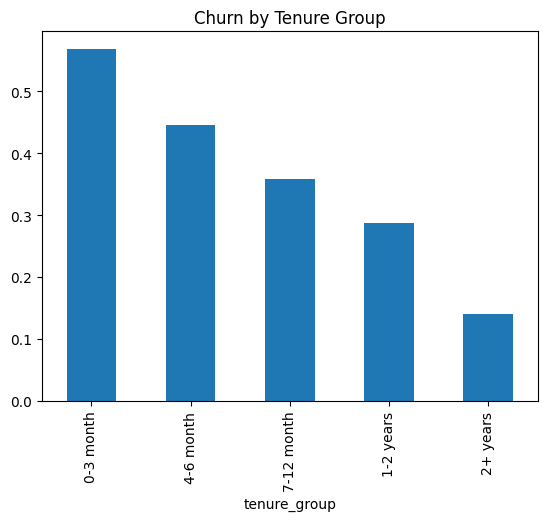

In [5]:
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 3, 6, 12, 24, 72],
    labels=['0-3 month', '4-6 month', '7-12 month', '1-2 years', '2+ years']
)

retention_by_tenure = df.groupby('tenure_group')['Churn'].mean()
retention_by_tenure.plot(kind='bar', title='Churn by Tenure Group')


# 3. LTV (Lifetime Value)

### **We created a new column called LTV (Customer Lifetime Value), which represents how much revenue a customer has generated over their entire relationship with the company.**

#### To calculate it, we simply multiplied:

1. #### **MonthlyCharges — how much the customer pays per month**

2. #### **tenure — how many months the customer has been with us**

#### This gives us an estimate of the total value each customer brings.

#### Then we visualized two things:

#### LTV: Churn vs Not Churn – to compare how much value is typically lost when a customer churns.

#### LTV by Contract Type – to see which types of contracts bring in the most long-term revenue.

#### This helps identify which segments of customers are most valuable and where to focus retention efforts.



In [6]:
df['LTV'] = df['MonthlyCharges'] * df['tenure']


<Axes: title={'center': 'LTV by Contract Type'}, xlabel='Contract'>

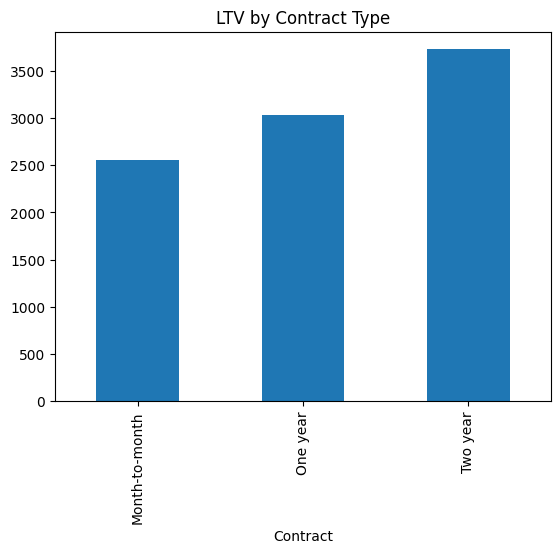

In [7]:
df.groupby('Churn')['LTV'].mean().plot(kind='bar', title='LTV: Churn vs Not Churn')
df.groupby('Contract')['LTV'].mean().plot(kind='bar', title='LTV by Contract Type')


### **We analyzed the distribution of optional services among customers by checking how many of them had features like:**

* #### Online Security

* #### Online Backup

* #### Device Protection

* #### Tech Support

* #### Streaming TV

* #### Streaming Movies

#### For each service, we calculated the proportion of customers who have it enabled or not.

#### This helps us understand customer behavior — for example, whether customers who churned were less likely to use certain services, or if loyal customers tend to subscribe to more features.

#### This insight can guide us in identifying which services are linked to higher retention and could be emphasized in customer plans.



In [8]:
features = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in features:
    print(f"\n{col}:")
    print(df[col].value_counts(normalize=True))



OnlineSecurity:
OnlineSecurity
No                     0.497298
Yes                    0.286547
No internet service    0.216155
Name: proportion, dtype: float64

OnlineBackup:
OnlineBackup
No                     0.438993
Yes                    0.344852
No internet service    0.216155
Name: proportion, dtype: float64

DeviceProtection:
DeviceProtection
No                     0.439989
Yes                    0.343857
No internet service    0.216155
Name: proportion, dtype: float64

TechSupport:
TechSupport
No                     0.493743
Yes                    0.290102
No internet service    0.216155
Name: proportion, dtype: float64

StreamingTV:
StreamingTV
No                     0.399460
Yes                    0.384386
No internet service    0.216155
Name: proportion, dtype: float64

StreamingMovies:
StreamingMovies
No                     0.395478
Yes                    0.388367
No internet service    0.216155
Name: proportion, dtype: float64


Feature Usage Analysis
We examined how frequently customers use various optional services:

* Online Security: 28.7% use it, while 49.7% have internet but don't use it.

* Online Backup: Used by 34.5% of customers.

* Device Protection: Similar pattern — 34.4% usage.

* Tech Support: Only 29% of customers with internet use it, and nearly 50% don’t.

* Streaming TV & Movies: The most popular services, with 38–39% usage.

Additionally, 21.6% of customers don’t have internet service at all, which explains the "No internet service" category across all features.

### Insights
* Security and tech support features are underused, possibly due to lack of perceived value or poor user experience.

* Entertainment features (Streaming TV and Movies) are much more popular, showing higher engagement.

* This suggests that customers may stay longer if they feel they’re getting value from content-based services.

#### These patterns can help tailor retention strategies by focusing on popular services and rethinking or bundling the less-used ones.



### **Churn Rate by Payment Method**
We plotted the churn rate based on the customer's payment method.
To do this, we calculated the average churn for each group using:

<Axes: title={'center': 'Churn Rate by Payment Method'}, xlabel='PaymentMethod'>

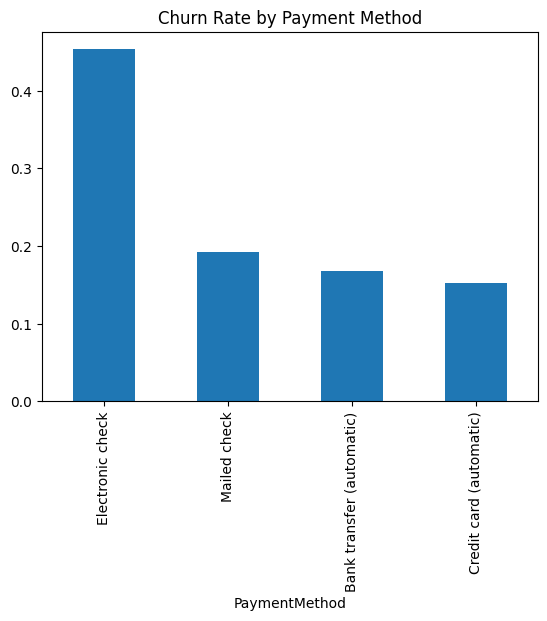

In [9]:
df.groupby('PaymentMethod')['Churn'].mean().sort_values(ascending=False).plot(kind='bar', title='Churn Rate by Payment Method')


### Insights from the chart:
* Electronic check users have the highest churn rate (~45%) — much higher than any other method.

* Customers who pay by Mailed check, Bank transfer (automatic), or Credit card (automatic) churn significantly less.

* Automatic payments are associated with lower churn, suggesting convenience reduces the likelihood of cancellation.

In [10]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 23/23 [00:01<00:00, 19.33it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

This report helped us quickly detect key issues and correlations in the dataset.

# Model

### Churn Prediction Using Logistic Regression

We trained a simple and interpretable model — **Logistic Regression** — to predict customer churn.

#### Preprocessing
- Numerical features (`tenure`, `MonthlyCharges`, `TotalCharges`) were imputed (mean) and scaled.
- Categorical features were imputed (most frequent) and one-hot encoded.
- Features like `customerID` and `LTV` were excluded from training.

#### Pipeline & Cross-Validation
- Used `StratifiedKFold` (5 splits) to ensure balanced evaluation.
- Metrics calculated:
  - **Accuracy**
  - **AUC**
  - **Confusion Matrix**
  - **Classification Report**
  - **ROC Curve**

#### Output
- The model predicts churn probabilities (`churn_prob` column).
- These predictions can later be compared with `LTV` for business insights.

This serves as a strong baseline before testing more advanced models.


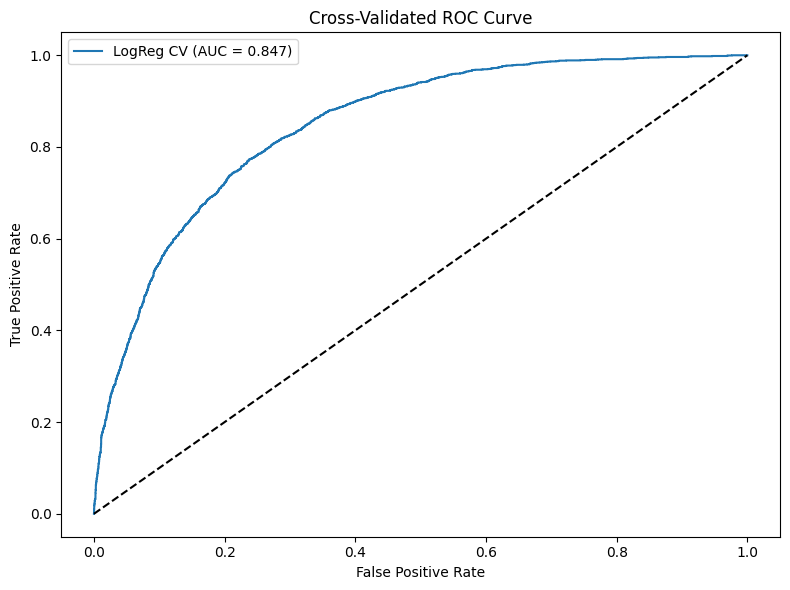

🔍 Accuracy (CV): 0.807
📈 AUC (CV): 0.847
📊 Confusion Matrix (CV):
 [[4681  482]
 [ 873  996]]
📋 Classification Report (CV):
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      5163
           1       0.67      0.53      0.60      1869

    accuracy                           0.81      7032
   macro avg       0.76      0.72      0.73      7032
weighted avg       0.80      0.81      0.80      7032



In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

# 🔧 Step 1: Data prep — drop IDs, targets, and things we shouldn't touch
X = df.drop(columns=['customerID', 'Churn', 'LTV'], errors='ignore')
y = df['Churn']

# 🧮 Separate features: numerics and categories
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = [col for col in X.columns if col not in numeric_features]

# 🧼 Numeric pipeline: fill NaNs and scale to z-space
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# 🎭 Categorical pipeline: fill NaNs and one-hot encode
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# 🧩 Combine both pipelines into a preprocessor
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# 🛠️ Step 2: Full pipeline with Logistic Regression (can swap out later)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# 🔁 Step 3: Run stratified 5-fold CV to mimic real-world distribution
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 🔍 Predict class labels and probabilities during CV
y_pred_cv = cross_val_predict(pipeline, X, y, cv=cv, method='predict')
y_prob_cv = cross_val_predict(pipeline, X, y, cv=cv, method='predict_proba')[:, 1]

# 📊 Step 4: Metrics — how did we do?
acc = round(accuracy_score(y, y_pred_cv), 3)
auc = round(roc_auc_score(y, y_prob_cv), 3)
conf_matrix = confusion_matrix(y, y_pred_cv)
report = classification_report(y, y_pred_cv)

# 🧠 Step 5: Final train on all data (we trust it now)
pipeline.fit(X, y)

# 📈 Step 6: Get churn probabilities for everyone (used in dashboards, etc.)
df['churn_prob'] = pipeline.predict_proba(X)[:, 1]

# 🔬 Step 7: Plot ROC to visualize trade-offs between TPR and FPR
fpr, tpr, _ = roc_curve(y, y_prob_cv)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"LogReg CV (AUC = {auc})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cross-Validated ROC Curve')
plt.legend()
plt.tight_layout()
plt.show()

# 🧾 Step 8: Print metrics so we know what’s going on
print("🔍 Accuracy (CV):", acc)
print("📈 AUC (CV):", auc)
print("📊 Confusion Matrix (CV):\n", conf_matrix)
print("📋 Classification Report (CV):\n", report)


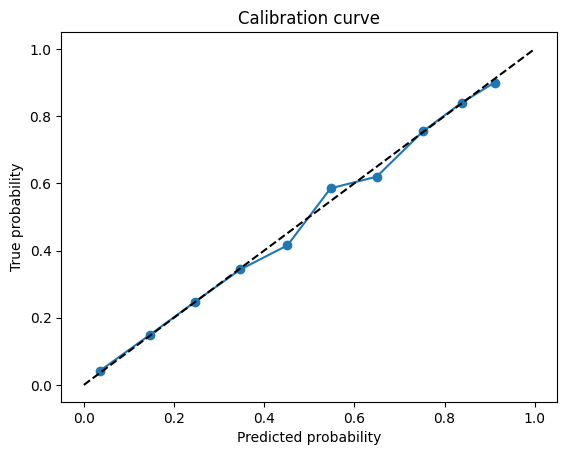

In [14]:
from sklearn.calibration import calibration_curve
prob_true, prob_pred = calibration_curve(y, y_prob_cv, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Predicted probability")
plt.ylabel("True probability")
plt.title("Calibration curve")
plt.show()


### ✅ Model Evaluation Results

Our logistic regression model shows **strong performance** in predicting customer churn.

#### 🔢 Cross-Validation Metrics
- **Accuracy**: 0.807
- **AUC (ROC)**: 0.847 — the model is good at distinguishing between churned and non-churned customers.
- **Confusion Matrix**:
  - True Negatives: 4681
  - False Positives: 482
  - False Negatives: 873
  - True Positives: 996
- **Classification Report**:
  - Precision for churned class (1): 0.67
  - Recall for churned class (1): 0.53
  - F1-score: 0.60

#### 📈 ROC Curve
- The curve shows good separation from the diagonal baseline, indicating **strong discriminatory power**.

#### 📊 Calibration Curve
- The predicted probabilities are well-aligned with actual outcomes.
- The curve is close to the diagonal → **no signs of overfitting**, and the model is well-calibrated.

> The model performs well as a first baseline, both in terms of classification ability and probability calibration.


# Business Metrics

## 💼 Business Impact Simulation: Retention & Risk Segmentation
We estimate the financial impact of churn and simulate potential cost savings from retention efforts.

In [19]:
# Group by contract and payment method for churn and LTV overview
df.groupby('Contract')[['Churn', 'LTV']].mean()
df.groupby('PaymentMethod')[['Churn', 'LTV']].mean()

# Estimated savings if 30% of high-risk churners are retained
retention_rate = 0.3
savings = high_risk[high_risk['Churn'] == 1]['LTV'].sum() * retention_rate

# Business summary
print(f"👥 Customers in high-risk group: {len(high_risk)}")
print(f"📉 Average churn in high-risk group: {high_risk['Churn'].mean():.3f}")
print(f"💰 Average LTV in high-risk group: ${high_risk['LTV'].mean():.2f}")
print(f"💸 Potential revenue lost (actual churned): ${lost_money:.2f}")
print(f"💼 Estimated savings if 30% retained: ${savings:.2f}")


👥 Customers in high-risk group: 630
📉 Average churn in high-risk group: 0.971
💰 Average LTV in high-risk group: $435.07
💸 Potential revenue lost (actual churned): $271499.30
💼 Estimated savings if 30% retained: $81449.79


### 💼 High-Risk Segment Summary

Based on model predictions (churn probability > 0.7), we identified a high-risk group of customers:

- 👥 **Customers in high-risk group**: 630  
- 📉 **Average churn rate** in this group: **97.1%**  
- 💰 **Average LTV** per customer: **$435.07**  
- 💸 **Estimated revenue lost** (from actual churned customers): **$271,499.30**  
- 💼 **Potential savings if 30% retained**: **$81,449.79**

> These customers are both likely to churn and highly valuable. Targeted retention campaigns focused on this group could deliver strong ROI.


#### ✅ Interpretation:
We defined high-risk customers as those with a churn probability > 0.7.

The total estimated lost revenue from churned high-risk customers is calculated based on their Lifetime Value (LTV).

This allows us to prioritize retention strategies and estimate the business impact of customer churn.

You can further break this down by contract type, service usage, or payment method to build actionable retention strategies.



## Visual Analysis
### Heatmap of Average LTV by Churn Probability Group

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


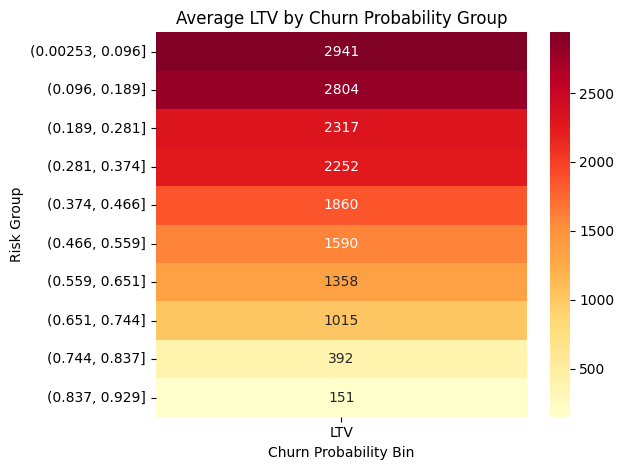

In [20]:
# Create churn probability bins
df['churn_bin'] = pd.cut(df['churn_prob'], bins=10)

# Compute average LTV per risk bin
heatmap = df.groupby('churn_bin')['LTV'].mean().reset_index()
heatmap['churn_bin'] = heatmap['churn_bin'].astype(str)

# Plot heatmap
sns.heatmap(
    heatmap.pivot_table(index='churn_bin', values='LTV'),
    annot=True, fmt=".0f", cmap="YlOrRd"
)
plt.title("Average LTV by Churn Probability Group")
plt.xlabel("Churn Probability Bin")
plt.ylabel("Risk Group")
plt.tight_layout()
plt.show()


### 🔥 Heatmap: Average LTV by Churn Probability Group

This heatmap shows how **average customer lifetime value (LTV)** changes across different **churn risk levels**.

#### ✅ Key Insight:
- Customers with **low churn probability** (left/top) have the **highest average LTV**.
- As churn probability increases, **average LTV drops significantly**.
- The highest-risk group has an average LTV of just **$151**, compared to over **$2,900** in the most stable group.

> This suggests that high-value customers are typically more stable, while customers at high risk of leaving tend to generate less long-term revenue.

🧠 Use this insight to prioritize retention efforts on **high-risk but high-LTV outliers**, rather than on low-value, high-risk segments.


## 📊 Churn Probability Distribution

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


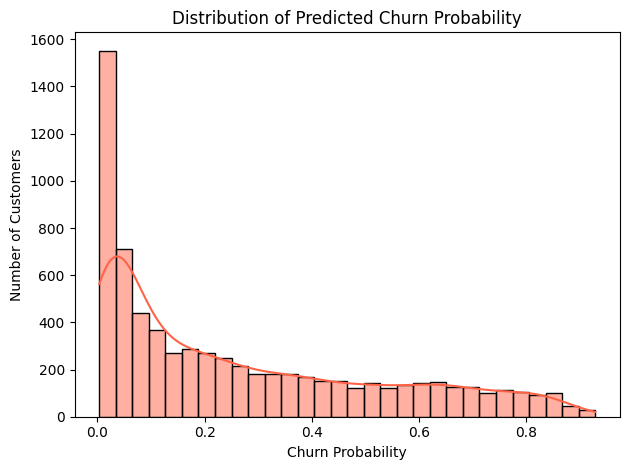

In [21]:
sns.histplot(df['churn_prob'], bins=30, kde=True, color='tomato')
plt.title('Distribution of Predicted Churn Probability')
plt.xlabel('Churn Probability')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


### 📊 Distribution of Predicted Churn Probability

This histogram shows the distribution of **churn probabilities** predicted by the model for all customers.

#### 🧠 Insights:
- The majority of customers have a **very low predicted churn probability** (close to 0), meaning most are considered stable.
- There's a **long tail** of customers with moderate to high churn risk.
- A small group of customers have **very high risk** (>0.7), which we flagged earlier as the **high-risk segment**.

> The distribution is highly right-skewed, which is expected in most businesses — most customers stay, and only a fraction churn.  
This shape validates that the model is not overpredicting risk.


## 📊 Average Churn & LTV by Customer Segments
We grouped customers by Contract type and Payment method to compare their average churn rate and lifetime value (LTV).

In [61]:
# Average churn and LTV by contract type
df.groupby('Contract')[['Churn', 'LTV']].mean()

# Average churn and LTV by payment method
df.groupby('PaymentMethod')[['Churn', 'LTV']].mean()


,Churn,LTV
PaymentMethod,,
Bank transfer (automatic),0.167315,3081.130285
Credit card (automatic),0.152531,3070.263872
Electronic check,0.452854,2089.680275
Mailed check,0.192020,1054.877400


### 💳 Churn Rate and LTV by Payment Method

| Payment Method             | Churn Rate | Avg. LTV ($) |
|---------------------------|------------|--------------|
| Bank transfer (automatic) | 0.167      | 3081.13      |
| Credit card (automatic)   | 0.153      | 3070.26      |
| Electronic check          | 0.453      | 2089.68      |
| Mailed check              | 0.192      | 1054.88      |

#### 🧠 Insights:
- **Automatic payments** (bank transfer, credit card) are associated with the **lowest churn rates** and **highest LTV**.
- **Electronic check** users churn **three times more often** than automatic payers, with **lower LTV**.
- **Mailed check** users also have **low LTV** and higher churn than automatic payers.

> Encouraging customers to switch to automatic payment methods could significantly improve retention and revenue.
